# String Matcher
The idea is to match a string using a genetic algorithm. The model would basically learn what the string is through multiple generations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import itertools
import pandas as pd

In [2]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [3]:
class string_matcher:
        
    def __init__ (self, password, population_size, mutation_rate, best_survivors, total_survivors, length_max):
        self.password = password
        self.population_size = population_size
        self.best_survivors = best_survivors
        self.total_survivors = total_survivors
        self.length_max = length_max
        self.mutation_rate = mutation_rate
        
        self.best_individual = np.asarray(["abc", -0.01])
        self.gen_count = 0
        
        self.average_cost_array = np.asarray([])
        self.best_cost_array = np.asarray([])
        
        self.characters = string.ascii_letters + string.digits
        
        self.__generate_first_population()
        
    def make_child(self, parent_1, parent_2):
        longer_parent  = list(parent_1 if len(parent_1) > len(parent_2) else parent_2)
        shorter_parent = list(parent_2 if len(parent_1) > len(parent_2) else parent_1)
    
        child = longer_parent.copy()
        n = len(shorter_parent)
        i = 0
        while i < n:
            child[i] = random.choice(self.characters) if random.uniform(0, 1) > self.mutation_rate else child[i]
            
            if (i < len(shorter_parent)):
                child[i] = shorter_parent[i] if random.uniform(0, 1) > 0.5 else longer_parent[i]
            
            if(len(child) < self.length_max):
                if (random.uniform(0,1) > self.mutation_rate):
                    child.insert(i, random.choice(self.characters))
                    n+=1
                
            if (random.uniform(0,1) > self.mutation_rate):
                child.remove(child[i])
                n-=1
            i+=1
        return "".join(child)
    
    def evaluate_cost(self, actual, new):
        together = itertools.zip_longest(actual, new, fillvalue=None)
        cost = len([a for a,b in together if a == b])
        cost /= max(len(actual), len(new))
        return cost

    def string_gen(self, length):
        individual = "".join(random.choice(self.characters) for _ in range(length))
        return individual
    
    def display_generation(self):
        print(self.current_population)
        
    def __generate_first_population(self):
        population = []
        for _ in range(0,self.population_size):
            length = random.randint(1,self.length_max)
            individual = self.string_gen(length)
            population.append(individual)
        self.current_population = np.c_[np.asarray(population), np.zeros(len(population))]
        self.__generation_cost()
        self.__log_generation()
        self.gen_count = 1
        
    def __generation_cost(self):
        for i in range(0, len(self.current_population)):
            self.current_population[i][1] = self.evaluate_cost(self.password, self.current_population[i][0])
        self.current_population = self.current_population[self.current_population[:,1].argsort()[::-1]]
        if (self.current_population[0][1] > self.best_individual[1]):
            self.best_individual = self.current_population[0]
        
    def __select_to_breed(self):
        survivors = self.current_population[0:self.best_survivors].copy()
        random_ind = []
        for _ in range(0, (self.total_survivors - self.best_survivors)):
            random_ind.append(self.current_population[random.randint(self.best_survivors,len(self.current_population) - 1)])
        random_ind = np.asarray(random_ind)
        return np.r_[survivors, random_ind]
    
    def __log_generation(self):
        print("String: ", self.current_population[0][0], " Cost: ", self.current_population[0][1])
        self.average_cost_array = np.append(self.average_cost_array, self.current_population[:,1].ravel().astype(np.float).mean())
        self.best_cost_array = np.append(self.best_cost_array, self.current_population[0][1].astype(np.float))
        
    def plot_costs(self):
        plt.figure(figsize=(10,10))
        plt.plot(self.average_cost_array, label='Average Cost')
        plt.plot(self.best_cost_array, label='Best Cost')
        plt.legend(loc='lower right')
        plt.show()
    
    def __display_best_individual(self):        
        print("Best Individual in ", self.gen_count, " generations")
        print("String: ", self.best_individual[0], " Cost: ", self.best_individual[1])
        
    def __next_generation(self):
        parents = self.__select_to_breed()
        population = []
        for i in range(0, 10):
            for j in range(0, 10):
                population.append(self.make_child(parents[i][0], parents[j][0]))
        self.current_population = np.c_[np.asarray(population), np.zeros(len(population))]
        self.gen_count += 1
        self.__generation_cost()
        self.__log_generation()
    
    def run(self, epochs):
        for _ in range(0, epochs):
            self.__next_generation()
            if (self.best_individual[1].astype(np.float) == 1.0):
                break
        self.__display_best_individual()
    
        

In [4]:
mypwd = "ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1Z"

In [8]:
matcher = string_matcher(password=mypwd, population_size=10000, best_survivors=70, total_survivors=100, mutation_rate=0.97, length_max=50)

String:  AZObdXF81mJqT6tK8MWH3rPypqPeFgoktDwzKRoOQcIyg  Cost:  0.13333333333333333


In [9]:
matcher.run(1000)

String:  Ws5RGMs0GRE1yzLw8MUCOSbnokkTgNvZZ  Cost:  0.15789473684210525
String:  ABObtX8o1aN7TttK8jW916Py8qSeFgoDtD2RoOQQIg  Cost:  0.21428571428571427
String:  A7VbX0x01aJyyzL88Mw9O6Pnp5Pe14vowwwpK3RaVQaIy  Cost:  0.26666666666666666
String:  ABObd0k11mJ6TKt78MW936Py4hae1g3rwD2KKrNVI  Cost:  0.2926829268292683
String:  ABObXXxH1JJ7yzu78MGmO6Py45ae14vo0k2pRrRaVQaIy  Cost:  0.3111111111111111
String:  ABbLd0kH1mJqhKL78MC9O6PyphPz1QkrTo2zz6NVIcha  Cost:  0.3409090909090909
String:  ABbLd0kH1mJqhKL78MC9O6PyphPz1QkrTo2zz6NVIcha  Cost:  0.3409090909090909
String:  ABOLd0sH1mJqyKL78MG9O6Pyp5Pe14kr0o2zR6NVIQhaay  Cost:  0.3695652173913043
String:  ABObd0xH1RJqKKu78MG9O6Py45Pe143rTo2dd6rVIIy  Cost:  0.37209302325581395
String:  ABObd0kH1JJqyKL78MG9O6Py45P4443rT22zK6rVIQay  Cost:  0.38636363636363635
String:  ABOL00kH1RJqhKL78MW9O6Py45P444rrTK2zK6rVIQy  Cost:  0.3953488372093023
String:  ABOdd0xH1RJeyKL78MG9O6Py45P4443T222K6rrIay  Cost:  0.40476190476190477
String:  ABbD00xH1RJqhKL78MG9O6Pyp5P44

String:  ABCEEFHH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCOEFHH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCOEFHH1IJ44KL78MN9O6PQR543U4VWXX2YN  Cost:  0.7894736842105263
String:  ABCEEFdH1IJ44KL78MN9O6PQR54UU4VWXX2YN  Cost:  0.7894736842105263
String:  ABCEEFHH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCEEFdH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCEEFdH1IJ44KL78MN9O6PQR54UU4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCEEFdH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCEEFdH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCEEFdH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCEEFdH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCEEFdH1IJ44KL78MN9O6PQR543U4VWXX2YNN  Cost:  0.7894736842105263
String:  ABCEEFJH1IJ44KL78MN9O6PQR54TU4VWXX2YNNN  Cost:  0.7948717948717948
String:  ABCEEFdH1IJK4KL78

String:  ABCEEFGH1IJ44KL78MN9O6PQR58TU4VWXX2Y1O  Cost:  0.868421052631579
String:  ABCEEFGH1IJ44KL78MN9O6PQR58TU4VWXX2Y1O  Cost:  0.868421052631579
String:  ABCEEFGH1IJJ4KL78MN9O6PQR58TU4VWXX2Y1OO  Cost:  0.8461538461538461
String:  ABCEEFGH1IJJ4KL78MN9O6PQR58TU4VWXX2Y1O  Cost:  0.868421052631579
String:  ABCEEFGH1IJ44KL78MN9O6PQR58TU4VWXX2Y1O  Cost:  0.868421052631579
String:  ABCEEFGH1IJJ4KL78MN9O6PQR58TU4VWXX2Y1O  Cost:  0.868421052631579
String:  ABCIEFGH1IJ44KL78MN9O6PQR58TU4VWXX2Y1OO  Cost:  0.8461538461538461
String:  ABCEEFGH1IJ44KL78MN9O6PQR58TU4VWXX2Y1O  Cost:  0.868421052631579
String:  ABCEEFGH1IJ44KL78MN9O6PQR58TU4VWXX2Y1O  Cost:  0.868421052631579
String:  ABCIEFGH1IJd4KL78MN9O6PQR58TU4VWXX2Y1O  Cost:  0.868421052631579
String:  ABCEEFGH1IJJ4KL78MN9O6PQR5STU4VWXX2Y1OO  Cost:  0.8717948717948718
String:  ABCEEFGH1IJJ4KL78MN9O6PQR5STU4VWXX2Y1OO  Cost:  0.8717948717948718
String:  ABCEEFGH1IJJ4KL78MN9O6PQR5STU4VWXX2Y1OO  Cost:  0.8717948717948718
String:  ABCEEFGH1IJJ4KL78MN

String:  ABCDEFGH1IJ44KL78MN9O6PQR5STU4VW3X2Y1O  Cost:  0.9473684210526315
String:  ABCDEFGH1IJ54KL78MN9O6PQR5STU4VW3X2Y1OO  Cost:  0.9230769230769231
String:  ABCDEFGH1IJf4KL78MN9O6PQR5STU4VW3X2Y1O  Cost:  0.9473684210526315
String:  ABCDEFGH1IJf4KL78MN9O6PQR5STU4VW3X2Y1O  Cost:  0.9473684210526315
String:  ABCDEFGH1IJf4KL78MN9O6PQR5STU4VW3X2Y1OO  Cost:  0.9230769230769231
String:  ABCDEFGH1IJf4KL78MN9O6PQR5STU4VW3X2Y1OO  Cost:  0.9230769230769231
String:  ABCDEFGH1IJf4KL78MN9O6PQR5STU4VW3X2Y1OO  Cost:  0.9230769230769231
String:  ABCDEFGH1IJV4KL78MN9O6PQR5STU4VW3X2Y1OO  Cost:  0.9230769230769231
String:  ABCDEFGH1IJf4KL78MN9O6PQR5STU4VW3X2Y1O  Cost:  0.9473684210526315
String:  ABCDEFGH1IJf4KL78MN9O6PQR5STU4VW3X2Y1O  Cost:  0.9473684210526315
String:  ABCDEFGH1IJ44KL78MN9O6PQR5STU4VW3X2Y1O  Cost:  0.9473684210526315
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1OO  Cost:  0.9487179487179487
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1OO  Cost:  0.9487179487179487
String:  ABCDEFGH1

String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1W  Cost:  0.9736842105263158
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1W  Cost:  0.9736842105263158
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1W  Cost:  0.9736842105263158
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1W  Cost:  0.9736842105263158
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1W  Cost:  0.9736842105263158
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1W  Cost:  0.9736842105263158
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1cW  Cost:  0.9487179487179487
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1WW  Cost:  0.9487179487179487
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1WW  Cost:  0.9487179487179487
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1WW  Cost:  0.9487179487179487
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1WW  Cost:  0.9487179487179487
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1WW  Cost:  0.9487179487179487
String:  ABCDEFGH1IJ14KL78MN9O6PQR5STU4VW3X2Y1WW  Cost:  0.9487179487179487
String:  ABCDEFGH1

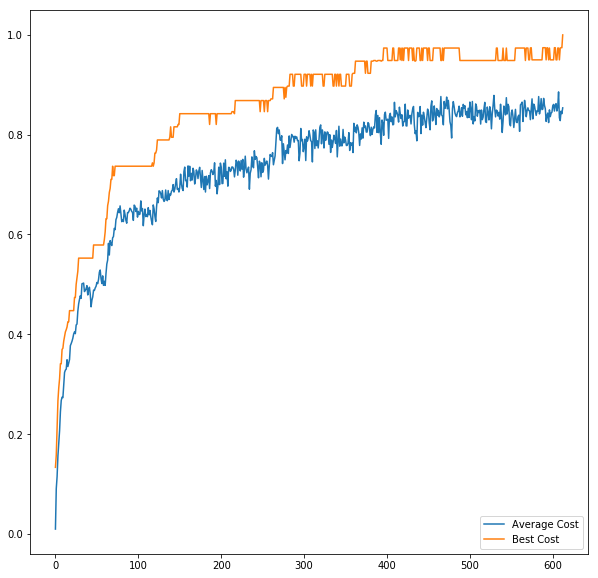

In [10]:
matcher.plot_costs()